In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [3]:
df = pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [5]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}\n")

Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 30

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 41

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 12

Column: Country
Unique Values: ['India']
Number of Unique Values: 1

Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2



In [11]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [13]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [15]:
df['Age'] = df['Age'].replace(0, np.nan)

In [17]:
df['Age'].fillna(df['Age'].median())
df['Salary'].fillna(df['Salary'].mean())

0      5312.467742
1      5312.467742
2      2300.000000
3      3000.000000
4      4000.000000
          ...     
143    9024.000000
144    8787.000000
145    4034.000000
146    5034.000000
147    8202.000000
Name: Salary, Length: 148, dtype: float64

In [19]:
df.duplicated().sum()

4

In [21]:
df1= df.drop_duplicates()
df1

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


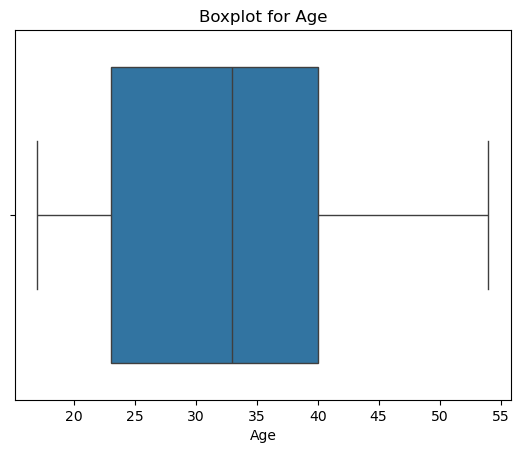

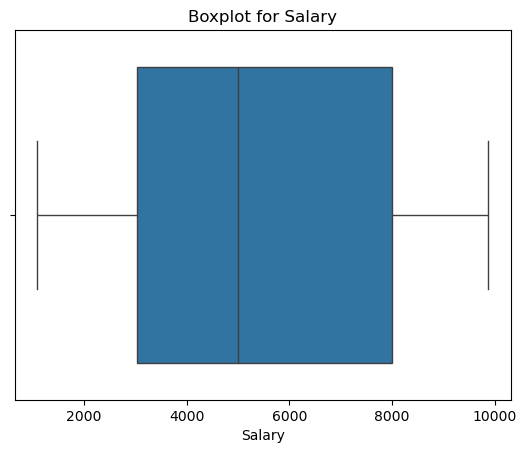

In [23]:
for column in ['Age', 'Salary']:
    plt.figure()
    sns.boxplot(x= df1[column])
    plt.title(f"Boxplot for {column}")


In [25]:
q1 = df1['Age'].quantile(0.25)
q3 = df1['Age'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
df = df1[(df1['Age'] >= lower_limit) & (df1['Age'] <= upper_limit)]

In [27]:
filtered_data = df1[(df1['Age'] > 40) & (df1['Salary'] < 5000)]
print(filtered_data)

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


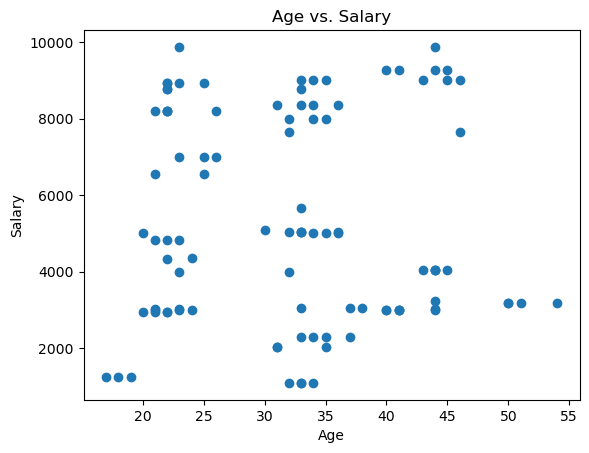

In [29]:
plt.scatter(df1['Age'], df1['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary')
plt.show()

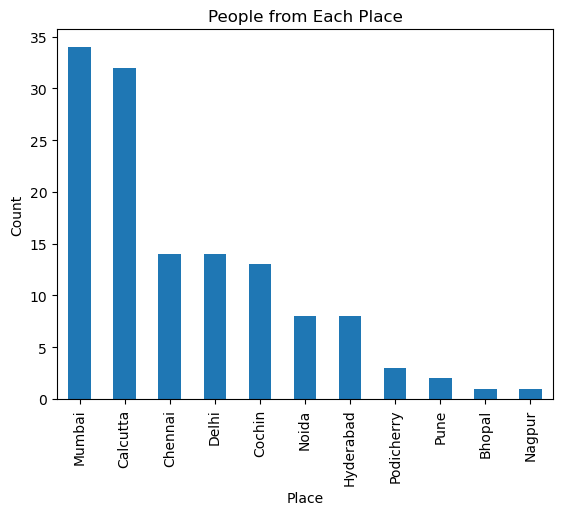

In [31]:
place_counts = df1['Place'].value_counts() 
place_counts.plot(kind='bar')
plt.title('People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [53]:
df2=df1.copy()

In [39]:
df_l = pd.get_dummies(df1, columns=['Company', 'Place', 'Country'])
df_l

,Age,Salary,Gender,Company_0,Company_1,Company_2,Company_3,Company_4,Company_5,Company_6,...,Place_3,Place_4,Place_5,Place_6,Place_7,Place_8,Place_9,Place_10,Place_11,Country_0
0,20.0,NaN,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,30.0,NaN,0,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,35.0,2300.0,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.0,0,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,23.0,4000.0,0,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,0,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
143,33.0,9024.0,1,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.0,1,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
146,33.0,5034.0,1,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [87]:
label_encoder = LabelEncoder()
df2['Company_N'] = label_encoder.fit_transform(df2['Company'])
df2['Place_N'] = label_encoder.fit_transform(df2['Place'])
df2['Country_N'] = label_encoder.fit_transform(df2['Country'])
df2.head()

,Company,Age,Salary,Place,Country,Gender,Company_N,Place_N,Country_N
0,4,20.0,NaN,2,0,0,4,2,0
1,2,30.0,NaN,6,0,0,2,6,0
2,4,35.0,2300.0,1,0,0,4,1,0
3,2,40.0,3000.0,4,0,0,2,4,0
4,4,23.0,4000.0,6,0,0,4,6,0


#Feature Scaling

In [95]:
scaler = StandardScaler()
data= df1[['Age', 'Salary']]
scaler.fit(data)
scaled_data= scaler.transform(data)
print("Standard Scaled Data:\n", scaled_data)
df1[['Age_Scaled', 'Salary_Scaled']] = scaled_data


Standard Scaled Data:
 [[-1.3450945          nan]
 [-0.22802906         nan]
 [ 0.33050366 -1.15877891]
 [ 0.88903638 -0.88689921]
 [-1.00997487 -0.49849963]
 [        nan -0.11010005]
 [        nan  0.27829953]
 [-1.00997487  0.66669911]
 [ 0.21879711  1.0550987 ]
 [ 1.44756909  1.44349828]
 [-1.00997487         nan]
 [ 0.21879711 -1.62913081]
 [ 1.44756909         nan]
 [-1.56850758 -1.57281287]
 [ 0.88903638 -0.88689921]
 [-1.00997487 -0.88689921]
 [-1.00997487 -0.87524722]
 [ 0.21879711 -0.11010005]
 [-1.12168141         nan]
 [-0.00461597         nan]
 [ 0.55391675 -0.86942123]
 [ 2.00610181 -0.81543368]
 [-1.23338795 -0.17845837]
 [        nan  0.2142136 ]
 [        nan  0.69932468]
 [-1.00997487  1.4213595 ]
 [ 0.21879711  1.18909655]
 [ 1.44756909  1.55380376]
 [-1.00997487  1.78373631]
 [ 0.33050366 -1.2620932 ]
 [ 1.55927564  0.92071244]
 [-1.3450945  -0.91253358]
 [ 1.44756909 -0.48529404]
 [ 0.4422102  -0.09689446]
 [-0.67485523  1.13355541]
 [ 0.33050366  1.45281987]
 [-0.

C:\Users\Anirudh Kumar\AppData\Local\Temp\ipykernel_7884\1737573941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Age_Scaled', 'Salary_Scaled']] = scaled_data
C:\Users\Anirudh Kumar\AppData\Local\Temp\ipykernel_7884\1737573941.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Age_Scaled', 'Salary_Scaled']] = scaled_data


In [97]:
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(df1[['Age', 'Salary']])
df1[['Age_N', 'Salary_N']] = minmax_scaled_data
print(df1.head())

   Company       Age    Salary  Place  Country  Gender  Age_Scaled  \
0        4 -1.345094       NaN      2        0       0   -1.345094   
1        2 -0.228029       NaN      6        0       0   -0.228029   
2        4  0.330504 -1.158779      1        0       0    0.330504   
3        2  0.889036 -0.886899      4        0       0    0.889036   
4        4 -1.009975 -0.498500      6        0       0   -1.009975   

   Salary_Scaled     Age_N  Salary_N  
0            NaN  0.081081       NaN  
1            NaN  0.351351       NaN  
2      -1.158779  0.486486  0.137817  
3      -0.886899  0.621622  0.217480  
4      -0.498500  0.162162  0.331285  


C:\Users\Anirudh Kumar\AppData\Local\Temp\ipykernel_7884\2151053114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Age_N', 'Salary_N']] = minmax_scaled_data
C:\Users\Anirudh Kumar\AppData\Local\Temp\ipykernel_7884\2151053114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Age_N', 'Salary_N']] = minmax_scaled_data
